<a href="https://colab.research.google.com/github/moimigueldev/tensorflow-ztm/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're goint to learn how to write neural network with classification problems


types of classification problems:
* binary
* multiclass classification
* multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles 
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
# Check out the features (X)
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the label
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand, let's visualize it

In [4]:
import pandas as pd
circles = pd.DataFrame({'X0': X[:, 0], 'X1':X[:,1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


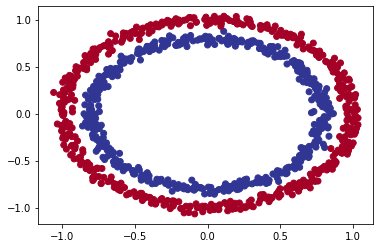

In [5]:
# Lets plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:,1], c = y, cmap=plt.cm.RdYlBu)

In [6]:
# Input & Output shape
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. [Tweak
6. Evaluate]

In [8]:
import tensorflow as tf

tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Note: the 'accuracy' metrics tells us out of X # of samples, how many did we get right? %
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics='accuracy')


model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4830


In [9]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)


32/32 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and ourmodel is ggetting around ~50% accuracy... it's perfming as if it's guessing
Let's try to improve our model by adding an extra layer

In [10]:
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics='accuracy')

model_2.fit(X, y, epochs=5, verbose=0)

model_2.fit(X, y, epochs=200, verbose=0)
print('evaluation of model_2:', model_2.evaluate(X, y))


32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5000
evaluation of model_2: [0.6935995817184448, 0.5]


In [11]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

# Improving our model

How can we improve our model because right now it looks like it is just guessing?



In [12]:
tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics='accuracy')

model_3.fit(X, y, epochs=5, verbose=0)

model_3.fit(X, y, epochs=100, verbose=0)
print('evaluation of model_3:', model_3.evaluate(X, y))


32/32 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.5080
evaluation of model_3: [0.6979429125785828, 0.5080000162124634]


To visualize our models predictions let's create a function `plot_decision_boundary()`


* Take in trained model X, y
* Create a meshgrid of the different x values
* make predictions across the meshgrid
* plot the predictions as well as a line between zones (where each unique class falls


In [13]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)

  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2d arrays togeher

  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # We have to reshape our predictions to get them ready
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classification


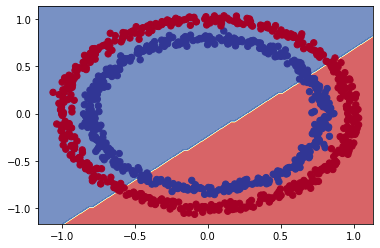

In [14]:
# Checkout the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
#             y_reg_train,
#             epochs=100)

We compiled our model for a binary classification problem, but we're now working on a regression problem. Let's change the model to suit our data

In [16]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100, verbose=0)

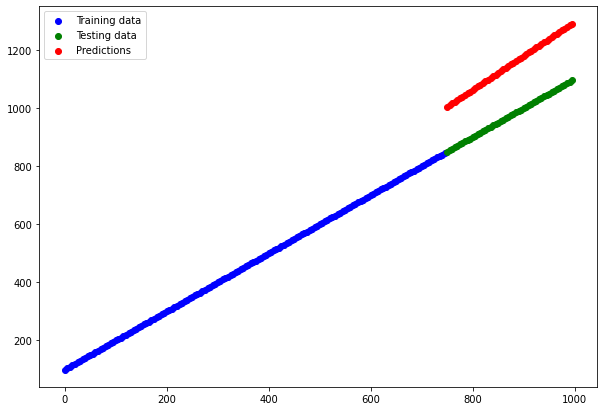

In [17]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

In [18]:
# The missing piece : None-linearity

In [19]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, tf.keras.activations.linear)
])


model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the recompiled model
history = model_4.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

In [20]:
first_X=X[:, 0]
second_X=X[:, 1]

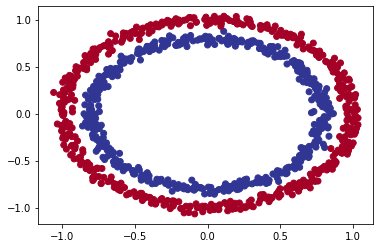

In [21]:
# Check out our data
plt.scatter(first_X, second_X, c=y, cmap=plt.cm.RdYlBu)

doing binary classification


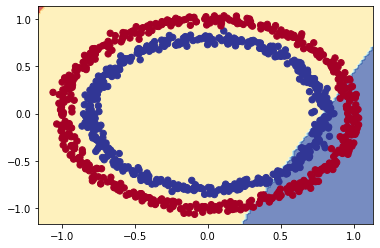

In [22]:
# Check the descision boundary for model
plot_decision_boundary(model_4, X, y)

Let's try to build first NN with a nonlinear activation function


In [23]:
# Setup random seed
tf.random.set_seed(42)

# Create a non-linear function
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, tf.keras.activations.relu)
])


model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the recompiled model
history = model_5.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

In [24]:
# Time to replicate the multi-layer neaural network from TensorFlow playground

# Setup random seed
tf.random.set_seed(42)

# Create a non-linear function
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, tf.keras.activations.relu),
  tf.keras.layers.Dense(4, tf.keras.activations.relu),
  tf.keras.layers.Dense(1),

])


model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the recompiled model
history = model_6.fit(X, y, epochs=250, verbose=0)

In [25]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


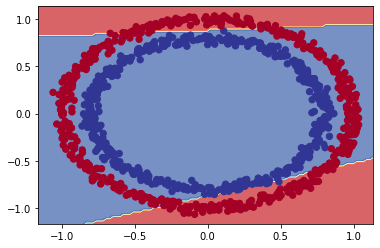

In [26]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [27]:
# Time to replicate the multi-layer neaural network from TensorFlow playground

# Setup random seed
tf.random.set_seed(42)

# Create a non-linear function
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, tf.keras.activations.relu),
  tf.keras.layers.Dense(4, tf.keras.activations.relu),
  tf.keras.layers.Dense(1, tf.keras.activations.sigmoid),

])


model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the recompiled model
history = model_7.fit(X, y, epochs=100, verbose=0)

doing binary classification


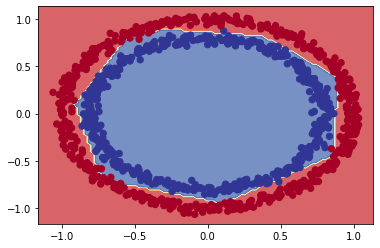

In [28]:
plot_decision_boundary(model_7, X, y)

In [29]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

**Question:** What's wrong with the predictions we've made?
We need to split our data

**Note:** The combination of linear and non-linear functions is one of the key fundamentals of NN

Now we've discussed the concept of linear a and non-linear functions, let's see them in action


In [30]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

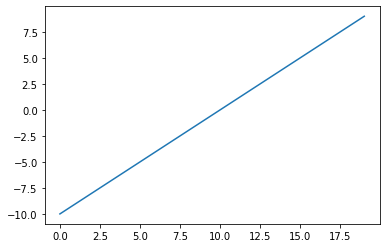

In [31]:
# Visualize our toy tensor
plt.plot(A)

In [32]:
# Let's start by replicating sigmoid 
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

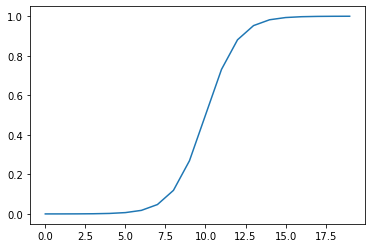

In [33]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

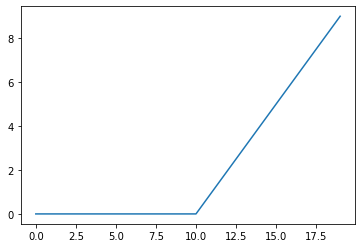

In [34]:
# Let's recreate the relu fucntion
def relu(x):
  return tf.maximum(0, x)


# Lets plot our toy tensor to our custom relu function

plt.plot(relu(A))

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

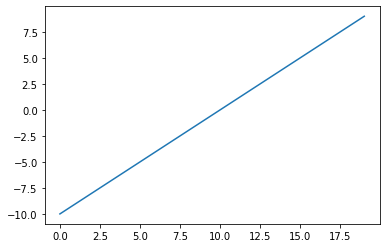

In [35]:
# Lets' try the linear activation function
# > The linear activation function just returns tensor unmodified
plt.plot(tf.keras.activations.linear(A))
A == tf.keras.activations.linear(A)

# Evaluating and improving our classification

So far we've been training and testing on the same dataset. In machine learning this is basically considered a sin

In [36]:
# Split into our train and test set
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape


((800, 2), (200, 2))

In [37]:
# Let's recreate a model to fit on training data and evaluate on the tesing set

# Time to replicate the multi-layer neaural network from TensorFlow playground

# Setup random seed
tf.random.set_seed(42)

# Create a non-linear function
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, tf.keras.activations.relu),
  tf.keras.layers.Dense(4, tf.keras.activations.relu),
  tf.keras.layers.Dense(1, tf.keras.activations.sigmoid),

])


model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Fit the recompiled model
history = model_8.fit(X_train, y_train, epochs=25, verbose=1)
model_8.evaluate(X_test, y_test)


Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

[0.12468849867582321, 1.0]

doing binary classification
doing binary classification


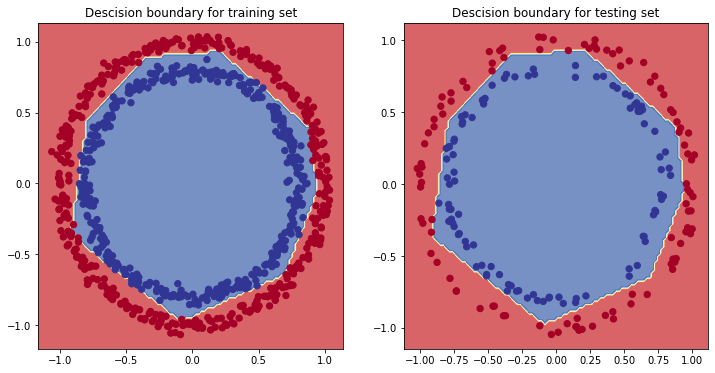

In [38]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Descision boundary for training set')
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Descision boundary for testing set')
plot_decision_boundary(model_8, X_test, y_test)

Text(0.5, 1.0, 'Model_8 loss curves')

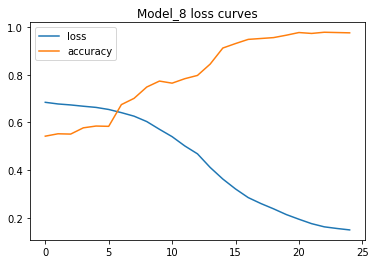

In [39]:
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')

In [40]:
history.history

{'accuracy': [0.5425000190734863,
  0.5525000095367432,
  0.5512499809265137,
  0.5774999856948853,
  0.5849999785423279,
  0.5837500095367432,
  0.675000011920929,
  0.7012500166893005,
  0.7487499713897705,
  0.7737500071525574,
  0.7649999856948853,
  0.7837499976158142,
  0.7975000143051147,
  0.8450000286102295,
  0.9125000238418579,
  0.9312499761581421,
  0.9487500190734863,
  0.9524999856948853,
  0.956250011920929,
  0.9662500023841858,
  0.9775000214576721,
  0.9737499952316284,
  0.9787499904632568,
  0.9775000214576721,
  0.9762499928474426],
 'loss': [0.6846511960029602,
  0.6777209639549255,
  0.6735945343971252,
  0.6681485772132874,
  0.6632686853408813,
  0.6545671820640564,
  0.6412575244903564,
  0.6264281272888184,
  0.6038310527801514,
  0.5714036226272583,
  0.540442943572998,
  0.5015039443969727,
  0.468331903219223,
  0.4113016128540039,
  0.3625059425830841,
  0.32090437412261963,
  0.2847079932689667,
  0.25971999764442444,
  0.23746901750564575,
  0.21351958

# Finding the best learning rate
To find the ideal learning rate we're going to use to following steps

* A learning rate **callback** - you can think of callback as an extra piece of func you can add to your model while it's training.

* Another model 

* A modified loss curves plot

In [41]:
tf.random.set_seed(42)

# Create a non-linear function
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, tf.keras.activations.relu),
  tf.keras.layers.Dense(4, tf.keras.activations.relu),
  tf.keras.layers.Dense(1, tf.keras.activations.sigmoid),

])


model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])


# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the recompiled model
history_9 = model_9.fit(X_train, y_train, epochs=100, verbose=1, callbacks=[lr_scheduler])
model_9.evaluate(X_test, y_test)


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

[0.6933157444000244, 0.4950000047683716]

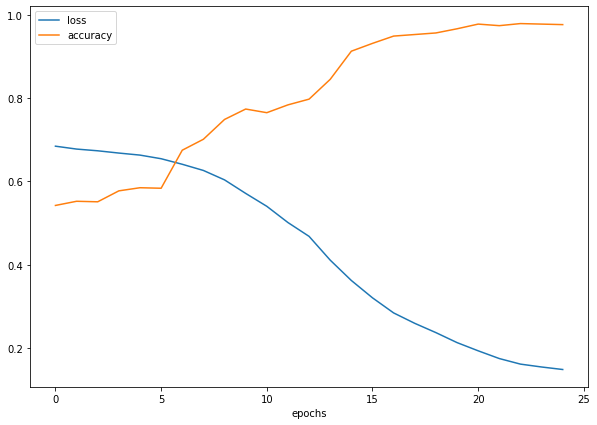

In [42]:
# Checkout the history 
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel='epochs')
plt.show()

In [43]:
# Plot the learning rate vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))


Text(0.5, 1.0, 'Learning Rate vs Loss')

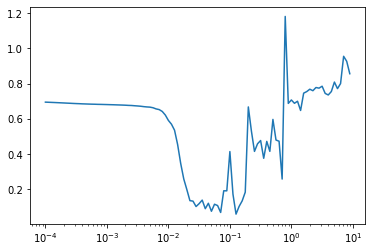

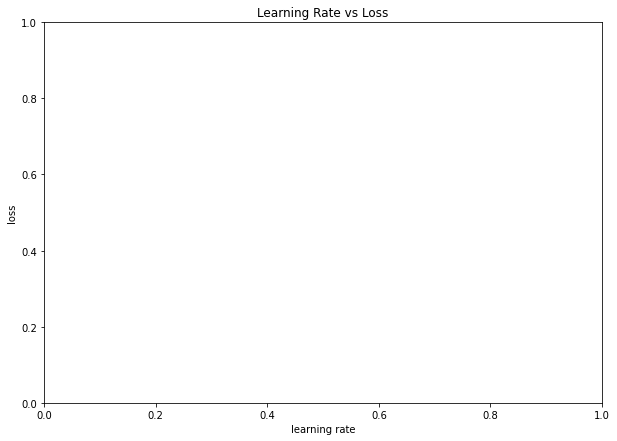

In [44]:
plt.semilogx(lrs, history_9.history['loss'])
plt.figure(figsize=(10, 7))
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('Learning Rate vs Loss')


In [45]:
# Example of other typical learning rate values are:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [46]:
# Let's try using ahigher ideal learning rate with the same model as before

model_10 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid'),
])


model_10.compile(loss=tf.keras.losses.BinaryCrossentropy() , optimizer=tf.keras.optimizers.Adam(learning_rate = 0.02), metrics=['accuracy'])

history_10 = model_10.fit(X_train, y_train, epochs=20)





Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5575
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5688
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.6150
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6050 - accuracy: 0.7125
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.7775
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.8225
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8275
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.8938
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 6ms/step - loss: 0.2621 - accuracy: 0.9375
Epoch 11/20
25/25 [

In [47]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9300


[0.1612270474433899, 0.9300000071525574]

In [48]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

doing binary classification
doing binary classification


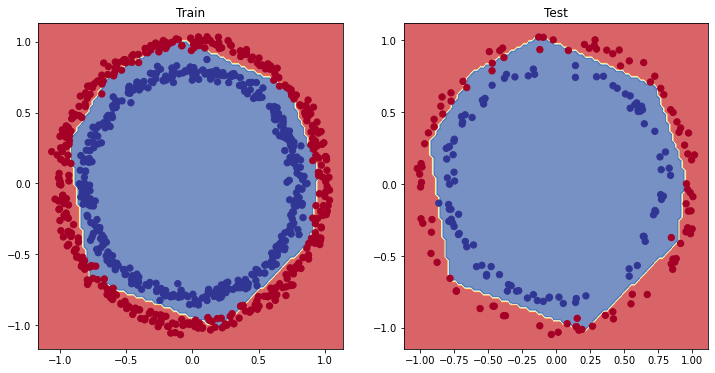

In [49]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X_test, y_test)

### More classification evaluation metrics

Along side visualizing our models results as much as possible, there are a handful of other classification evaluation methods and metrics you should be familiar with

* Accuracy
* Precision
* Recall
* F1-Score
* Confusion Matrix
* Classification Report from sklearn

In [50]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Mode loss on the test set {loss}')
print(f'Mode accuracy on the test set {(accuracy* 100): .2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9300
Mode loss on the test set 0.1612270474433899
Mode accuracy on the test set  93.00%


How about a confusion matrix?

In [51]:

from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)

# Convert preds probs to binary format and view first 10
y_preds = tf.round(y_preds)


# Create Matrix
confusion_matrix(y_test, y_preds)

array([[87, 14],
       [ 0, 99]])

Let's prettify our confusion matrix

**Note:** The Confusion Matrix code we're about to write is a remix of sklearn plot_confusion_matrix function

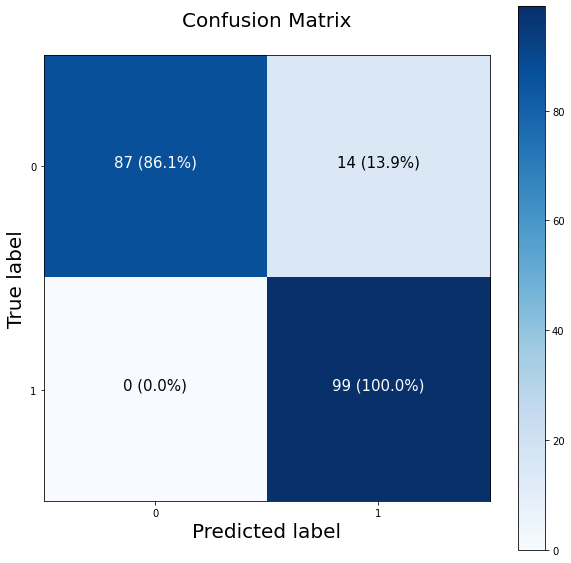

In [52]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a larger example (multiclass classification)

When you have more than 2 classes as an option, it'sknown as multiclass classification

* This means that if you have 3 or more different classes you have multiclass classification

To practice multiclass classifcation, we're going to build a NN to identify different items of clothing



In [53]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sortes into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [54]:
# Show the first training example:
print(f'Trainig Sample:\n{train_data[0]}')
print(f'Trainig label:\n{train_labels[0]}')

Trainig Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

In [55]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

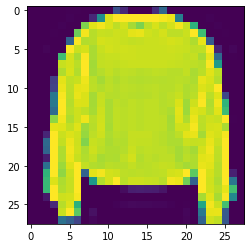

In [56]:
# Plot a single sample
plt.imshow(train_data[7])

In [57]:
# Check out sample label
train_labels[7]

2

In [58]:
# Create a small list so we can index onto our training labels so they're human readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

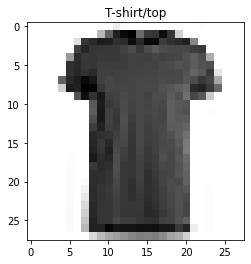

In [59]:
# Plot example image and its' label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

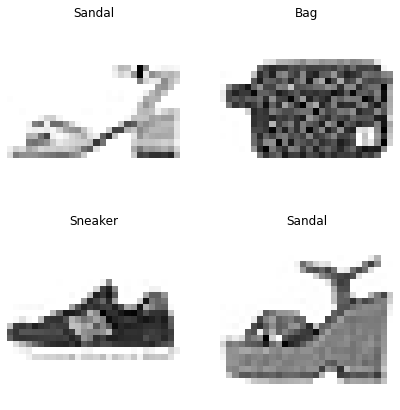

In [60]:
# Plot multiple random images
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Build a multiclass classifcation model

For our multiclass classifcation model we can use a similar architecture to our binary classifiers, however we are going to have to tweak a few things

* Input shape = (28 X 28) (The shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossEntropy
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = softmax


In [61]:
tf.random.set_seed(42)

# Create the model
# Our data needs to be flatten from 28x28 to (None, 784)
model_11 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28, 28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax'),
])


# model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [62]:
# Check the model summary
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Neural Networks prefer data to be scaled (or normalized) This means they like to hve the numbers in the tensors they try to find patterns between 0 & 1

In [63]:
# We can get our training and testing data between 0 & 1 bt dividing by the max

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values 
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [64]:
tf.random.set_seed(42)

# Create the model
# Our data needs to be flatten from 28x28 to (None, 784)
model_12 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28, 28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax'),
])


# model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

norm_history = model_12.fit(train_data_norm, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

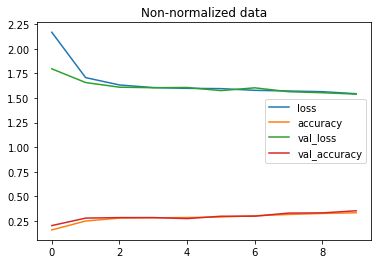

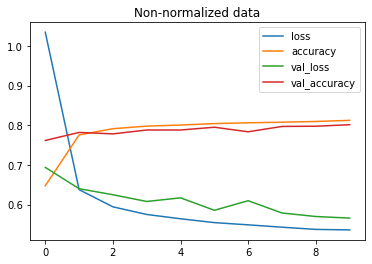

In [65]:
# Plot non normalized data
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')
# Plot normalized data
pd.DataFrame(norm_history.history).plot(title='Non-normalized data')

**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria. (e.g. same acrchitecture but different data or same data but different architecture)

In [66]:
# Finding the ideal learning rate

# tf.random.set_seed(42)

# # Create the model
# # Our data needs to be flatten from 28x28 to (None, 784)
# model_13 = tf.keras.Sequential([
#                                 tf.keras.layers.Flatten(input_shape=(28, 28)),
#                                 tf.keras.layers.Dense(4, activation='relu'),
#                                 tf.keras.layers.Dense(4, activation='relu'),
#                                 tf.keras.layers.Dense(10, activation='softmax'),
# ])

# # Create the learning rate callback
# # lambda function starts at 1e-3 and slowly increases the learning rate as it goes through the epochs
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


# # model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
# model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# find_lr_history = model_13.fit(train_data_norm, tf.one_hot(train_labels, depth=10), epochs=40, validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)), callbacks=[lr_scheduler])


In [67]:
# Plot the learning rate decay curve

# lrs = 1e-3 * (10**(tf.range(40)/20))
# plt.semilogx(lrs, find_lr_history.history['loss'])
# plt.xlabel('Learning Rate')
# plt.ylabel('loss')
# plt.title('Finding the ideal learning rate')

In [68]:
10**-3

0.001

In [69]:
# Finding the ideal learning rate

import tensorflow as tf


tf.random.set_seed(42)

# Create the model
# Our data needs to be flatten from 28x28 to (None, 784)
model_14 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28, 28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax'),
])

# Create the learning rate callback
# lambda function starts at 1e-3 and slowly increases the learning rate as it goes through the epochs


# model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model_14.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

ideal_lr_history = model_14.fit(train_data_norm, tf.one_hot(train_labels, depth=10), epochs=20, validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))


Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

# Evaluating our multi-class classification model

to evaluate we could:

* Evaluate its performance by using other classification metrics ( such as confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results by training it for longer or changin the arch
* Save and export it for use in application

Let's go through the top 2


In [70]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  
  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [71]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [72]:
# Make some predictions with our models
y_probs = model_14.predict(test_data_norm) # Prods is short for prediction probabilities

# View the first 5 predicions
y_probs[:5]

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

> **Note:** Remember to make predictions on the same kind of data was trained on

In [73]:
# Convert pred probs into integers
y_preds = y_probs.argmax(axis=1)
y_preds

array([9, 2, 1, ..., 3, 1, 5])

In [74]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [75]:
confusion_matrix(test_labels, y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

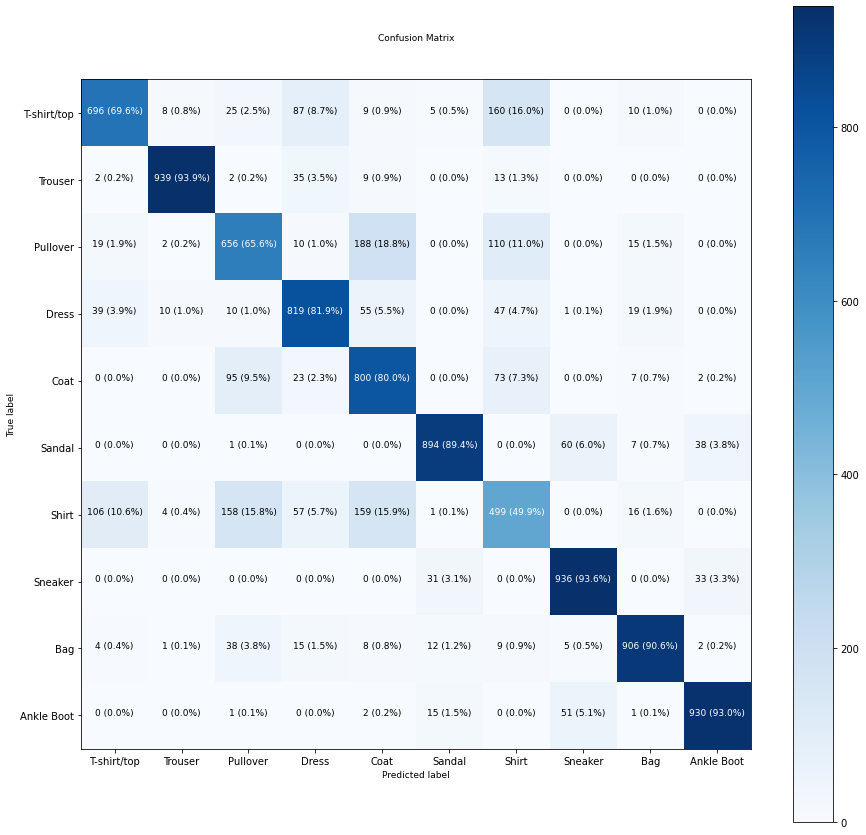

In [76]:
make_confusion_matrix(test_labels, y_preds, class_names, figsize=(15, 15), text_size=9)

> **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as psossible to develop further understanding of the data and the inputs and outputs of the models

How about we create a function for:

* Plot random image
* Make a prediction on said image
* label plot with true label and predicted label



In [77]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

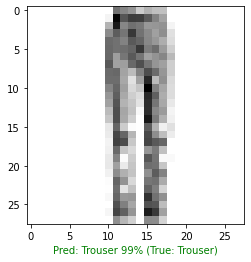

In [78]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data_norm, 
                  true_labels=test_labels, 
                  classes=class_names)

# What patterns is our model learning?

In [79]:
# Find the layers of our most recent model
model_14.layers

In [80]:
# Extract a particular layer
model_14.layers[1]

In [81]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()


# Shapes
weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

In [82]:
model_14.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [83]:
# Now lts check out the bias vector
biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))


Every neuron has a bias vector. Each of these is paired with a weights metrix.


The bias vector gets initialized as zeros (at least in the case of tensorflow Desnse layers)


The bias vector dictates how much the pattersn within the corresponding weights matrix should influence the next layer.

In [84]:
model_14.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


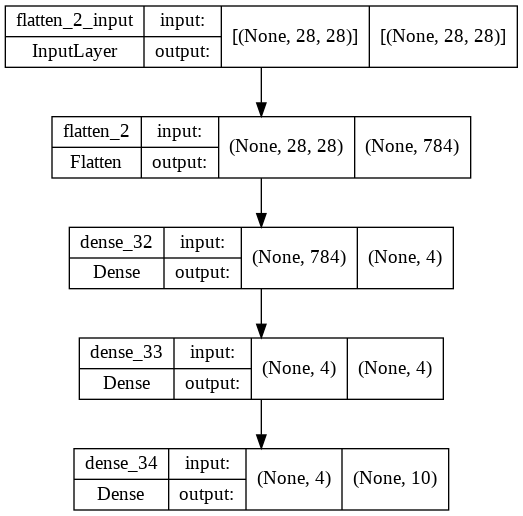

In [85]:
# Let's checkout another way of viewing our deep learning models

from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)